<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/Weight%20Of%20Evidence%20and%20Information%20Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import pyodbc

In [ ]:
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

In [ ]:
connection = pyodbc.connect('Driver={SQL Server};Server=10.115.74.4;DATABASE=AfterPay_V1_AI;Trusted_Connection=Yes;')

In [ ]:
data = pd.DataFrame()
for chunk in pd.read_sql_query('SELECT * FROM AfterPay_V1_AI.[dbo].[tbl_PlanPersistency_NetNew_Vintage]',connection,chunksize=10000):
    data = pd.concat([data,chunk],axis=0)

In [ ]:
print(data.dtypes)

AcctID                        object
OfferID                        int64
OfferStatus                   object
Stts_Dt_Tm            datetime64[ns]
Stts_Dt                       object
                           ...      
Bckt_Flr                      object
Max_Frst_Flr                   int64
Min_Frst_Flr                   int64
Pymnt_Pctg_Value             float64
Pymnt_Pctg_Trnsctn           float64
Length: 89, dtype: object


In [ ]:
df = pd.DataFrame(data)

In [ ]:
#Print Column Heads
print(df.head())

   AcctID  OfferID OfferStatus              Stts_Dt_Tm     Stts_Dt  \
0  142318   103885      Failed 2021-08-28 16:57:05.510  2021-08-28   
1  142499    54232      Closed 2021-06-19 18:26:36.227  2021-06-19   
2   14263    42186      Closed 2021-05-05 13:34:40.030  2021-05-05   
3  142711    79265      Closed 2021-07-04 19:08:01.093  2021-07-04   
4   14273    14083      Closed 2021-02-18 23:09:10.970  2021-02-18   

   Prv_Pln_Cnt        TU_Band          CDN ClientID EmailEligible  ...  \
0            0        604-710  10024462278    AP100             Y  ...   
1            0  Not Avaialble  10026228533    AP100             N  ...   
2            0  Not Avaialble  10013070865    AP100             N  ...   
3            0  Not Avaialble  10026748683    AP100             N  ...   
4            0  Not Avaialble  10013325930    AP100             N  ...   

  Ttl_Fl_Pymnt Ttl_Amt_Paid  Ttl_Amt_NSccs  Ttl_Amt_Fld  Ttl_Pln_Amt  \
0            0         0.00            0.0          0.0       

In [ ]:
#Convert Cancelled and Failed to Unsuccesful, Closed and Success to Successful
df.loc[(df.OfferStatus == 'Cancelled'),'OfferStatus']='1'
df.loc[(df.OfferStatus == 'Failed'),'OfferStatus']='1'
df.loc[(df.OfferStatus == 'Success'),'OfferStatus']='0'
df.loc[(df.OfferStatus == 'Closed'),'OfferStatus']='0'

In [ ]:
print(df.dtypes)

AcctID                        object
OfferID                        int64
OfferStatus                   object
Stts_Dt_Tm            datetime64[ns]
Stts_Dt                       object
                           ...      
Bckt_Flr                      object
Max_Frst_Flr                   int64
Min_Frst_Flr                   int64
Pymnt_Pctg_Value             float64
Pymnt_Pctg_Trnsctn           float64
Length: 89, dtype: object


In [ ]:
print(df["OfferStatus"])

0       1
1       0
2       0
3       0
4       0
       ..
9637    1
9638    1
9639    1
9640    0
9641    0
Name: OfferStatus, Length: 9642, dtype: object


In [ ]:
df1 = df["OfferStatus"]= df["OfferStatus"].astype(float)

In [ ]:
print(df.dtypes)

AcctID                        object
OfferID                        int64
OfferStatus                  float64
Stts_Dt_Tm            datetime64[ns]
Stts_Dt                       object
                           ...      
Bckt_Flr                      object
Max_Frst_Flr                   int64
Min_Frst_Flr                   int64
Pymnt_Pctg_Value             float64
Pymnt_Pctg_Trnsctn           float64
Length: 89, dtype: object


In [ ]:
list(df.select_dtypes(['object']).columns)

['AcctID',
 'Stts_Dt',
 'TU_Band',
 'CDN',
 'ClientID',
 'EmailEligible',
 'StrategyEmailEligibility',
 'CMState',
 'Age_Bracket',
 'StatusCode',
 'AccountType',
 'Top_Mrchnt',
 'Bckt_Flr']

In [ ]:
df1 = df.drop(columns=['AcctID','Stts_Dt','CDN','ClientID','EmailEligible','StrategyEmailEligibility','StatusCode','AccountType'])

In [ ]:
print(df1.dtypes)

OfferID                        int64
OfferStatus                  float64
Stts_Dt_Tm            datetime64[ns]
Prv_Pln_Cnt                    int64
TU_Band                       object
                           ...      
Bckt_Flr                      object
Max_Frst_Flr                   int64
Min_Frst_Flr                   int64
Pymnt_Pctg_Value             float64
Pymnt_Pctg_Trnsctn           float64
Length: 81, dtype: object


In [ ]:
df2 = df1.drop(columns=['CancelDate','OfferStrategyId'])

In [ ]:
df3 = df2.drop(columns=['Stts_Dt_Tm','PlaceDate'])

In [ ]:
#Create Transaction Window Variable
df3['Trnsctn_Wnd'] = df3.apply(lambda row: 
                              row.Lst_Trnsctn_Dt - row.Frst_Trnsctn_Dt, axis = 1)

df3['Trnsctn_Wnd'] = df3['Trnsctn_Wnd'].dt.days.astype('int64')

In [ ]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy="most_frequent")
#df4 = pd.DataFrame(imp.fit_transform(df3),columns=df3.columns, index=df3.index)

In [ ]:
df3 = df3.drop(columns=['Lst_Trnsctn_Dt', 'Frst_Trnsctn_Dt'])

In [ ]:
list(df3.select_dtypes(['object']).columns)

['TU_Band', 'CMState', 'Age_Bracket', 'Top_Mrchnt', 'Bckt_Flr']

In [ ]:
print(df3.dtypes)

OfferID                 int64
OfferStatus           float64
Prv_Pln_Cnt             int64
TU_Band                object
CMState                object
                       ...   
Max_Frst_Flr            int64
Min_Frst_Flr            int64
Pymnt_Pctg_Value      float64
Pymnt_Pctg_Trnsctn    float64
Trnsctn_Wnd             int64
Length: 76, dtype: object


In [ ]:
#Create functions for EDA
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize = True).reset_index()
    n_colors = len(variable_df)
    variable_df.set_index('index').T.plot(kind = 'barh', 
                                         stacked = True, 
                                         colormap = ListedColormap(sns.color_palette("Set1", n_colors)), 
                                         width = 0.15, ax=ax)

def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12, n_rows*3))
    
    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows, 2, i+1)
        eda_categorical(data, variable, ax=ax)
        plt.tight_layout()
        
        plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12, n_rows*5))
    palette = sns.color_palette('Set1', 3)
    
    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows, 6, i+1)
        sns.boxplot(x=variable, data=data, orient='v', palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)
        
        plt.show()

In [ ]:
list(df3.select_dtypes(include=np.number).columns) #Name numeric type columns

['OfferID',
 'OfferStatus',
 'Prv_Pln_Cnt',
 'MainEmailStrategyId',
 'PlaceAmt',
 'CurrentBalance',
 'Tenure',
 'Ttl_Prchs_Amt',
 'Avg_Prchs_Amt',
 'Max_Prchs_Amt',
 'Ttl_Pymnt_Pd',
 'Avg_Pymnt_Pd',
 'Max_Pymnt_Pd',
 'Ttl_Pymnt_Ovrd',
 'Avg_Pymnt_Ovrd',
 'Max_Pymnt_Ovrd',
 'No_Of_Pymnts',
 'No_Of_Lt_Pymnts',
 'No_Of_Ovrd_Pymnts',
 'Ttl_LtF_Pd',
 'Ttl_Lt_Fee_Ovrd',
 'Mrchnt_Cnt',
 'Unique_Mrchnt_Cnt',
 'No_of_Transactions',
 'Avg_Mnt_Gp',
 'Max_Mnt_Gp',
 'Avg_Dy_Gp',
 'Max_Dy_Gp',
 'Ttl_Act',
 'Offr_Pg_Act',
 'Lndng_Pg_Act',
 'PE_Pg_Act',
 'Prgrss_Pg_Act',
 'Schdl_Pymnt',
 'Schdl_Sccss',
 'Inf_Pg',
 'Sngl_Pymnt',
 'Pymnt_Flr',
 'Othr_Pg',
 'Act_Opn_Lndng_Pg',
 'Act_Opn_Offr_Pg',
 'Act_Opn_PE_Pg',
 'Act_Clck_Lndng_Pg',
 'Act_Sbmt_Offr_Pg',
 'Act_Opn_Sngl_Pymnt',
 'Act_Opn_Prgrss_Pg',
 'Act_Drp_Offr_Pg',
 'Act_Opn_Schdl_Sccs',
 'Act_Sccs_Pymnt',
 'Act_Opn_Acct_Info',
 'Act_Clck_Acct_Inf',
 'Act_Clck_Offr_Pg',
 'Act_Opn_Instnt_Flr',
 'Act_Drp_Schdl_Pymnt',
 'Act_Clck_Prgrss_Pg',
 'Act_Sbmt

In [ ]:
list(df3.select_dtypes(exclude=np.number).columns) #Name non-numeric type columns

['TU_Band', 'CMState', 'Age_Bracket', 'Top_Mrchnt', 'Bckt_Flr']

In [ ]:
#Create parser for columns
continuous, categorical = [], []
filter = ['OfferID', 'MainEmailStrategyId']

for col in [c for c in df3.columns if c not in filter and c != 'OfferStatus']:
    if is_numeric_dtype(df3[col]):
        continuous.append(col)
    else:
        categorical.append(col)

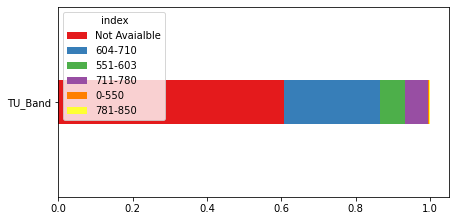

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
multiple_eda_categorical(df3, categorical)

array([[<AxesSubplot:title={'center':'OfferStatus'}>,
        <AxesSubplot:title={'center':'PlaceAmt'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Ttl_Prchs_Amt'}>,
        <AxesSubplot:title={'center':'Avg_Prchs_Amt'}>,
        <AxesSubplot:title={'center':'Max_Prchs_Amt'}>,
        <AxesSubplot:title={'center':'Ttl_Pymnt_Pd'}>,
        <AxesSubplot:title={'center':'Avg_Pymnt_Pd'}>],
       [<AxesSubplot:title={'center':'Max_Pymnt_Pd'}>,
        <AxesSubplot:title={'center':'Ttl_Pymnt_Ovrd'}>,
        <AxesSubplot:title={'center':'Avg_Pymnt_Ovrd'}>,
        <AxesSubplot:title={'center':'Max_Pymnt_Ovrd'}>,
        <AxesSubplot:title={'center':'No_Of_Pymnts'}>,
        <AxesSubplot:title={'center':'No_Of_Lt_Pymnts'}>,
        <AxesSubplot:title={'center':'No_Of_Ovrd_Pymnts'}>,
        <AxesSubplot:title={'center':'Ttl_LtF_Pd'}>],
       [<AxesSubplot:title={'center':'Ttl_Lt_Fee_Ovrd'}>,
        <AxesSubplot:title={'center':'Mrchnt_Cnt'}>,
   

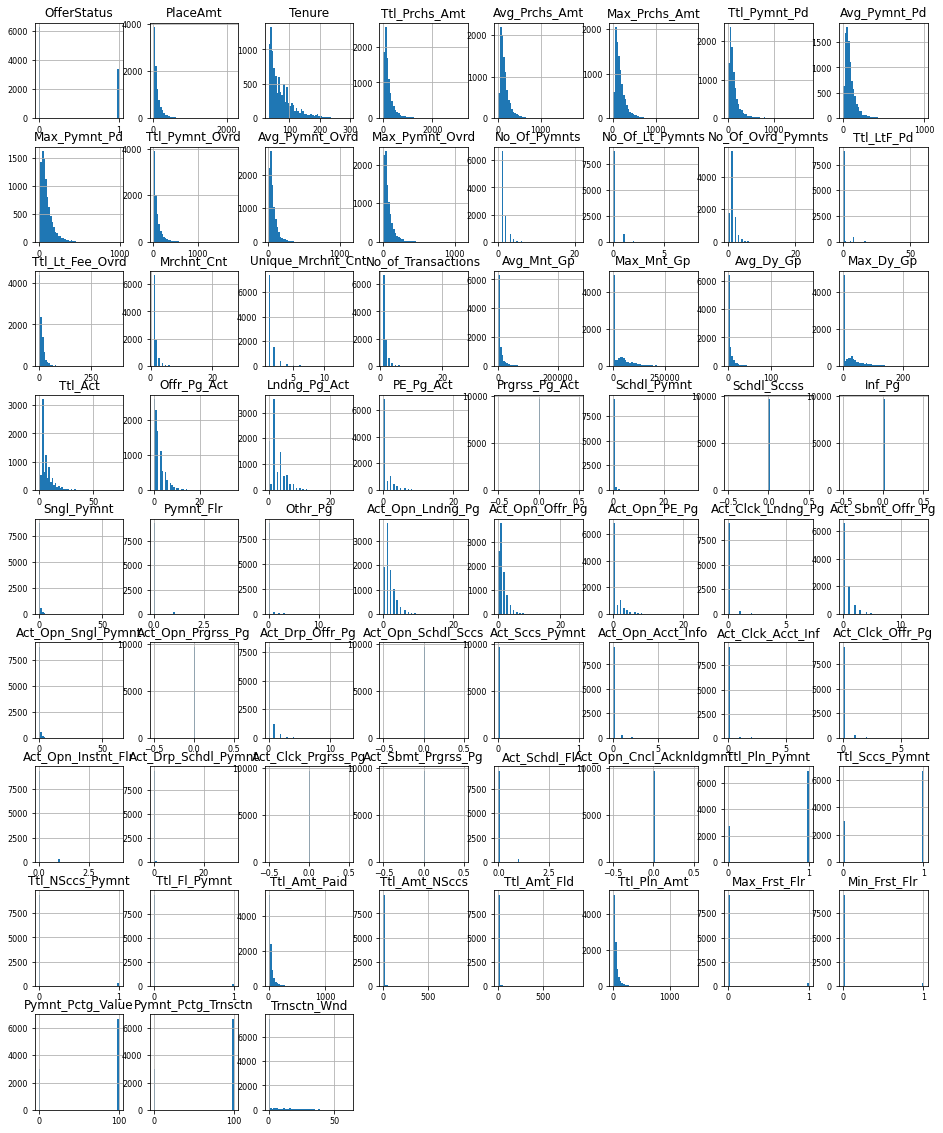

In [ ]:
#EDA for continuous features
df3 = df3.drop(columns=['OfferID', 'MainEmailStrategyId', 'Prv_Pln_Cnt', 'CurrentBalance'])
df3_num = df3.select_dtypes(include=['float64', 'int64'])
df3_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
#Run WoE and IV on all independent variables

#Define IV and WoE data
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF= pd.DataFrame()
    woeDF= pd.DataFrame()
    
    #Extract Columns Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        
        #Calculate the number of events in each group
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        # Calculate % of events in each group
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        
        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        
        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        #Calculate by multiplying delta of events and non-events with WoE
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
        
        #Show WoE Table
        if show_woe == True:
            print(d)
        
    return newDF, woeDF

In [ ]:
#Calculate WoE and IV for all variables
iv, woe = iv_woe(data=df3, target='OfferStatus', bins=10, show_woe=True)
print(woe)
print(iv)

Information value of TU_Band is 2.315722
  Variable         Cutoff     N  Events  % of Events  Non-Events  \
0  TU_Band          0-550    32    25.0     0.007355         7.0   
1  TU_Band        551-603   645   536.0     0.157693       109.0   
2  TU_Band        604-710  2487  1899.0     0.558694       588.0   
3  TU_Band        711-780   587   358.0     0.105325       229.0   
4  TU_Band        781-850    29     8.0     0.002354        21.0   
5  TU_Band  Not Avaialble  5862   573.0     0.168579      5289.0   

   % of Non-Events       WoE        IV  
0         0.001121  1.880945  0.011726  
1         0.017460  2.200766  0.308622  
2         0.094185  1.780335  0.826980  
3         0.036681  1.054791  0.072405  
4         0.003364 -0.357101  0.000361  
5         0.847189 -1.614519  1.095629  
Information value of CMState is 0.040054
   Variable Cutoff     N  Events  % of Events  Non-Events  % of Non-Events  \
0   CMState     AK    11     3.0     0.000883         8.0         0.001281  

In [ ]:
#Create a list of conditions for IV
conditions = [
    (iv['IV'] <= 0.02), 
    (iv['IV']> 0.02) & (iv['IV'] <= 0.1), 
    (iv['IV']> 0.1) & (iv['IV'] <= 0.3), 
    (iv['IV']> 0.3) & (iv['IV'] <= 0.5), 
    (iv['IV']> 0.5)
]

#Create a list of values we want to assign for each condition
definition = ['Not Useful', 'Weak', 'Medium', 'Strong', 'Suspicious']

# Create a new column and use np.select to assign values to it using our lists as arguments
iv['Predictor'] = np.select(conditions, definition)

In [ ]:
#View IV List
iv

,Variable,IV,Predictor
0,TU_Band,2.315722,Suspicious
0,CMState,0.040054,Weak
0,PlaceAmt,0.855196,Suspicious
0,Tenure,0.011002,Not Useful
0,Age_Bracket,0.000000,Not Useful
...,...,...,...
0,Max_Frst_Flr,0.296330,Medium
0,Min_Frst_Flr,0.296330,Medium
0,Pymnt_Pctg_Value,1.114702,Suspicious
0,Pymnt_Pctg_Trnsctn,1.114702,Suspicious


In [ ]:
df4 = df3.drop(columns=['CMState', 'PlaceAmt', 'Tenure', 'Avg_Prchs_Amt', 'Max_Prchs_Amt', 'Top_Mrchnt','Avg_Pymnt_Pd', 'Max_Pymnt_Pd', 
                       'Ttl_Pymnt_Ovrd', 'Max_Pymnt_Ovrd', 'No_Of_Lt_Pymnts', 'Ttl_LtF_Pd', 'Avg_Mnt_Gp', 'Max_Mnt_Gp',
                        'Avg_Dy_Gp', 'Max_Dy_Gp', 'Lndng_Pg_Act', 'PE_Pg_Act', 'Prgrss_Pg_Act', 'Schdl_Pymnt', 'Schdl_Sccss',
                        'Inf_Pg', 'Sngl_Pymnt', 'Pymnt_Flr', 'Othr_Pg', 'Act_Opn_Lndng_Pg', 'Act_Opn_PE_Pg', 'Act_Clck_Lndng_Pg',
                        'Act_Sbmt_Offr_Pg', 'Act_Opn_Prgrss_Pg', 'Act_Drp_Offr_Pg', 'Act_Opn_Schdl_Sccs', 'Act_Sccs_Pymnt',
                        'Act_Opn_Acct_Info', 'Act_Clck_Acct_Inf', 'Act_Clck_Offr_Pg', 'Act_Opn_Instnt_Flr',
                        'Act_Drp_Schdl_Pymnt', 'Act_Clck_Prgrss_Pg', 'Act_Sbmt_Prgrss_Pg', 'Act_Schdl_Fl',
                        'Act_Opn_Cncl_Acknldgmnt'])

In [ ]:
#Identify columns with categorical data
list(df4.select_dtypes(['object']).columns)

['TU_Band', 'Age_Bracket', 'Bckt_Flr']

In [ ]:
#Apply one hot encoder to both categorical columns

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

array_hot_encoded = ohe.fit_transform(df4[['TU_Band', 'Age_Bracket']]).toarray() #fit transform to arrays
feature_labels = ohe.get_feature_names()     #Extract categories
feature_labels = np.array(feature_labels).ravel()

features = pd.DataFrame(array_hot_encoded, columns=feature_labels)
df6 = features

In [ ]:
#Create Dataframe without categorical columns
df5 = df4.drop(columns=['TU_Band', 'Age_Bracket'])

In [ ]:
#Combine both Dataframes
df5 = df5.reset_index(drop=True)
df6 = df6.reset_index(drop=True)

DF_PP_AfterPay = pd.concat([df6, df5], axis=1)

In [ ]:
df7 = DF_PP_AfterPay
df7.head()

,x0_0-550,x0_551-603,x0_604-710,x0_711-780,x0_781-850,x0_Not Avaialble,x1_Under 18,OfferStatus,Ttl_Prchs_Amt,Ttl_Pymnt_Pd,...,Ttl_Amt_Paid,Ttl_Amt_NSccs,Ttl_Amt_Fld,Ttl_Pln_Amt,Bckt_Flr,Max_Frst_Flr,Min_Frst_Flr,Pymnt_Pctg_Value,Pymnt_Pctg_Trnsctn,Trnsctn_Wnd
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,161.15,13.43,...,0.00,0.0,0.0,0.00,0,0,0,0.0,0.0,14
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,241.82,181.36,...,22.70,0.0,0.0,22.70,No Fail,0,0,100.0,100.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,221.91,166.45,...,70.46,0.0,0.0,70.46,No Fail,0,0,100.0,100.0,2
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,56.77,28.38,...,30.39,0.0,0.0,30.39,No Fail,0,0,100.0,100.0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,61.14,45.85,...,0.00,0.0,0.0,0.00,0,0,0,0.0,0.0,0


In [ ]:
df8 = df7.drop(columns=['Bckt_Flr'])

In [ ]:
#Imputation of missing values where applicable
#df7 = DF_PP_AfterPay
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
df9 = pd.DataFrame(imp.fit_transform(df8), columns=df8.columns, index=df8.index)

In [ ]:
#Create X & Y for model building
X = df9.drop(columns=['OfferStatus'])
Y = df9['OfferStatus']

In [ ]:
#Create test train split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#Import and train Logistic Regression CLassifier
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=10,solver='liblinear') #Model function with 10 fold cross validation

clf.fit(X_train, Y_train) #Train the model using the training sets y_pred=clf.predict(X_test)

LogisticRegressionCV(cv=10, solver='liblinear')

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
Y_pred_train = clf.predict(X_train)

In [ ]:
#Model Performance Metrics
print("Model Metrics")

#Accuracy without cross validation
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Train Accuracy:",metrics.accuracy_score(Y_train, Y_pred_train))

## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred,labels=[1,0])

## Recall Score
recall1 = sklearn.metrics.recall_score(Y_test,Y_pred)
print("Test Recall:", recall1)

recall1 = sklearn.metrics.recall_score(Y_train,Y_pred_train)
print("Train Recall:", recall1)

## Precision Score
precision1 = sklearn.metrics.precision_score(Y_test,Y_pred)
print("Test Precision", precision1)

precision1 = sklearn.metrics.precision_score(Y_train,Y_pred_train)
print("Train Precision", precision1)

Model Metrics
Test Accuracy: 0.885939444214019
Train Accuracy: 0.901396763933066
Test Recall: 0.8323424494649228
Train Recall: 0.8557466770914777
Test Precision 0.8393285371702638
Train Precision 0.8641926569285432


In [ ]:
#Import and train Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() #Model function with 10 fold cross validation

from sklearn.model_selection import StratifiedKFold

#clf.fit(X_train, Y_train) #Train the model using the training sets y_pred=clf.predict(X_test)
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
#fprs, tprs, scores = [], [], []
#Y1 = Y.values.ravel()    
for (train, test), i in zip(cv.split(X, Y), range(5)):
    clf.fit(X.iloc[train],Y.iloc[train])
 

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
Y_pred_train = clf.predict(X_train)

In [ ]:
#Model Performance Metrics
print("Model Metrics")

#Accuracy without cross validation
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Train Accuracy:",metrics.accuracy_score(Y_train, Y_pred_train))

## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred,labels=[1,0])

## Recall Score
recall1 = sklearn.metrics.recall_score(Y_test,Y_pred)
print("Test Recall:", recall1)

recall1 = sklearn.metrics.recall_score(Y_train,Y_pred_train)
print("Train Recall:", recall1)

## Precision Score
precision1 = sklearn.metrics.precision_score(Y_test,Y_pred)
print("Test Precision", precision1)

precision1 = sklearn.metrics.precision_score(Y_train,Y_pred_train)
print("Train Precision", precision1)

Model Metrics
Test Accuracy: 0.9805060141020323
Train Accuracy: 0.9775964596874568
Test Recall: 0.9742990654205608
Train Recall: 0.9638222571765631
Test Precision 0.9708963911525029
Train Precision 0.9722332407774693


In [ ]:
#Feature Importance 

importance = clf.coef_[0]             #get importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,abs(v)))   #Feature with absolute value of coefficient
    


Feature: 0, Score: 0.27032
Feature: 1, Score: 1.36596
Feature: 2, Score: 0.98882
Feature: 3, Score: 0.36726
Feature: 4, Score: 1.06736
Feature: 5, Score: 2.07938
Feature: 6, Score: 0.15438
Feature: 7, Score: 0.00024
Feature: 8, Score: 0.00028
Feature: 9, Score: 0.01063
Feature: 10, Score: 0.62938
Feature: 11, Score: 0.10701
Feature: 12, Score: 0.01930
Feature: 13, Score: 0.23343
Feature: 14, Score: 0.00670
Feature: 15, Score: 0.23343
Feature: 16, Score: 0.06591
Feature: 17, Score: 0.18065
Feature: 18, Score: 0.24673
Feature: 19, Score: 1.76761
Feature: 20, Score: 1.56774
Feature: 21, Score: 0.00006
Feature: 22, Score: 1.56780
Feature: 23, Score: 0.21343
Feature: 24, Score: 0.12207
Feature: 25, Score: 0.20072
Feature: 26, Score: 0.28203
Feature: 27, Score: 0.07865
Feature: 28, Score: 1.52062
Feature: 29, Score: 1.52062
Feature: 30, Score: 0.00591
Feature: 31, Score: 0.00591
Feature: 32, Score: 0.02480


In [ ]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(cv=10, solver='liblinear')>